## Exploratory Data Analysis

The data set contains the data regarding several taxi trips and its duration in New York City. We will determine how different variables are dependent on the target variable Trip Duration.

Here is the description of all the variables / features available in the dataset which will help you to perform EDA:

- id - a unique identifier for each trip
- vendor_id - a code indicating the provider associated with the trip record
- pickup_datetime - date and time when the meter was engaged
- dropoff_datetime - date and time when the meter was disengaged
- passenger_count - the number of passengers in the vehicle (driver entered value)
- pickup_longitude - the longitude where the meter was engaged
- pickup_latitude - the latitude where the meter was engaged
- dropoff_longitude - the longitude where the meter was disengaged
- dropoff_latitude - the latitude where the meter was disengaged
- store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip)
- trip_duration - (target) duration of the trip in seconds

In [54]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [55]:
df = pd.read_csv("Data/nyc_taxi_trip_duration.csv")
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
id                    729322 non-null object
vendor_id             729322 non-null int64
pickup_datetime       729322 non-null object
dropoff_datetime      729322 non-null object
passenger_count       729322 non-null int64
pickup_longitude      729322 non-null float64
pickup_latitude       729322 non-null float64
dropoff_longitude     729322 non-null float64
dropoff_latitude      729322 non-null float64
store_and_fwd_flag    729322 non-null object
trip_duration         729322 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB


In [57]:
df.iloc[1]

id                              id0889885
vendor_id                               1
pickup_datetime       2016-03-11 23:35:37
dropoff_datetime      2016-03-11 23:53:57
passenger_count                         2
pickup_longitude                 -73.9883
pickup_latitude                   40.7317
dropoff_longitude                -73.9948
dropoff_latitude                  40.6949
store_and_fwd_flag                      N
trip_duration                        1100
Name: 1, dtype: object

In [58]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


The returned table gives certain insights:
- There are no numerical columns with missing data
- The passenger count varies between 1 and 9 with most people number of people being 1 or 2
- The trip duration varying from 1s to 1939736s~538 hrs. There are definitely some outliers present which must be treated.

* The 2 columns pickup_datetime and dropoff_datetime are now converted to datetime format which makes analysis of date and time data much more easier.

In [59]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])

### Target Exploration

Let's visualize the the target variable. 

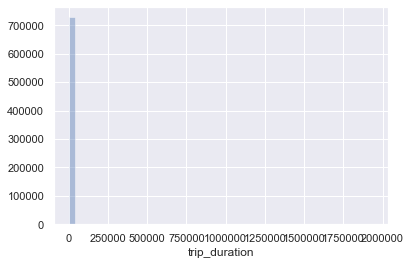

In [60]:
sns.distplot(df["trip_duration"], kde=False)
plt.show()

* Due to the huge outliers, it is very difficult to derive insights from this plot. In this case, we could convert such columns to log and then check the distributions.

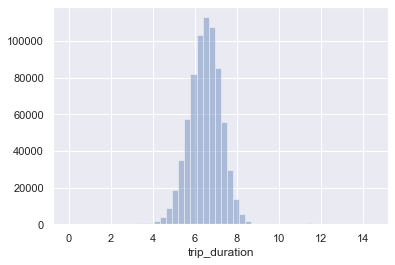

In [61]:
sns.distplot(np.log(df["trip_duration"]), kde=False)

plt.show()

* Now, we can see a normal distribution in the plot.

### Univariate Analysis

Lets have a look at the distribution of various variables in the Data set.

#### Passenger Count

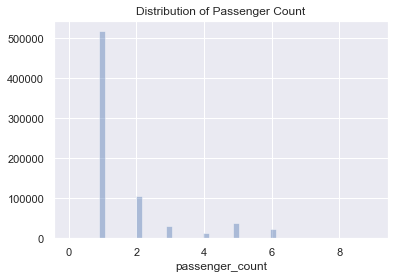

In [62]:
sns.distplot(df['passenger_count'],kde=False)
plt.title('Distribution of Passenger Count')
plt.show()

* Here we see that the mostly 1 or 2 passengers avail the cab. The instance of large group of people travelling together is rare.

#### The distribution of Pickup and Drop Off day of the week

It's better to convert these dates into days of the week so a pattern can be found.

In [63]:
df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()

* Now lets look at the distribution of the different days of week

In [64]:
df['pickup_day'].value_counts()

Friday       111744
Saturday     110252
Thursday     109344
Wednesday    105074
Tuesday      101254
Sunday        97682
Monday        93972
Name: pickup_day, dtype: int64

- Thus we see most trips were taken on Friday and Monday being the least.
- The distribution of trip duration with the days of the week is something to look into as well.

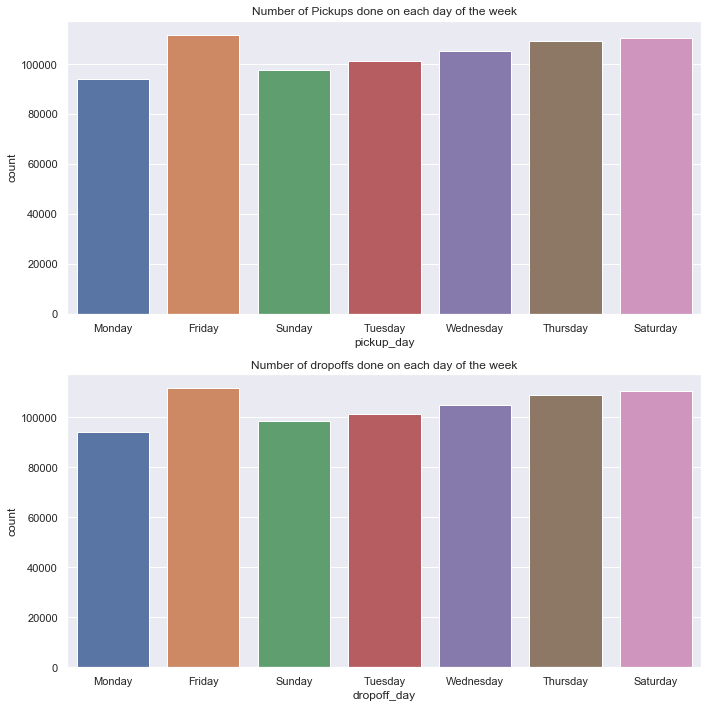

In [65]:
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.countplot(x='pickup_day',data=df,ax=ax[0])
ax[0].set_title('Number of Pickups done on each day of the week')
sns.countplot(x='dropoff_day',data=df,ax=ax[1])
ax[1].set_title('Number of dropoffs done on each day of the week')
plt.tight_layout()

**The distribution of Pickup and Drop Off hours of the day**

- The time part is represented by hours,minutes and seconds which is difficult for the analysis thus we divide the times into 4 time zones:
    - morning (4 hrs to 10 hrs),
    - midday (10 hrs to 16 hrs),
    - evening (16 hrs to 22 hrs),
    - late night (22 hrs to 4 hrs).

In [79]:
df1= df.copy()

In [122]:
df1.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_hour,pickup_hour1
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,Monday,Monday,16:40:21,16:40:21
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,Friday,Friday,23:35:37,23:35:37
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,Sunday,Sunday,17:59:33,17:59:33
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,Tuesday,Tuesday,09:44:31,09:44:31
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,Wednesday,Wednesday,06:42:23,06:42:23


In [82]:
df1["pickup_hour"] = df['pickup_datetime'].apply(lambda x :datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 14 columns):
id                    729322 non-null object
vendor_id             729322 non-null int64
pickup_datetime       729322 non-null datetime64[ns]
dropoff_datetime      729322 non-null datetime64[ns]
passenger_count       729322 non-null int64
pickup_longitude      729322 non-null float64
pickup_latitude       729322 non-null float64
dropoff_longitude     729322 non-null float64
dropoff_latitude      729322 non-null float64
store_and_fwd_flag    729322 non-null object
trip_duration         729322 non-null int64
pickup_day            729322 non-null object
dropoff_day           729322 non-null object
pickup_hour           729322 non-null object
dtypes: datetime64[ns](2), float64(4), int64(3), object(5)
memory usage: 77.9+ MB


In [126]:
df1["pickup_hour2"] = df['pickup_datetime'].dt.hour

In [127]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 16 columns):
id                    729322 non-null object
vendor_id             729322 non-null int64
pickup_datetime       729322 non-null datetime64[ns]
dropoff_datetime      729322 non-null datetime64[ns]
passenger_count       729322 non-null int64
pickup_longitude      729322 non-null float64
pickup_latitude       729322 non-null float64
dropoff_longitude     729322 non-null float64
dropoff_latitude      729322 non-null float64
store_and_fwd_flag    729322 non-null object
trip_duration         729322 non-null int64
pickup_day            729322 non-null object
dropoff_day           729322 non-null object
pickup_hour           729322 non-null object
pickup_hour1          729322 non-null object
pickup_hour2          729322 non-null int64
dtypes: datetime64[ns](2), float64(4), int64(4), object(6)
memory usage: 89.0+ MB


In [100]:
q = pd.to_datetime([(4, 0, 1), (10, 0, 1),(16, 0, 1), (22, 0, 1)])

TypeError: arg must be a string, datetime, list, tuple, 1-d array, or Series

In [101]:
df1.pickup_hour1

0         16:40:21
1         23:35:37
2         17:59:33
3         09:44:31
4         06:42:23
            ...   
729317    13:29:38
729318    00:43:11
729319    18:56:48
729320    09:50:47
729321    17:24:16
Name: pickup_hour1, Length: 729322, dtype: object

In [116]:
bins= [0, 4, 10, 16, 22, 24]

In [130]:
df1["pic"] = pd.cut(df1.pickup_hour2 ,bins, labels=["late night1","morning", "midday", "evening", "late night2"])
df1

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_hour,pickup_hour1,pickup_hour2,pic
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,Monday,Monday,16:40:21,16:40:21,16,midday
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,Friday,Friday,23:35:37,23:35:37,23,late night2
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,Sunday,Sunday,17:59:33,17:59:33,17,evening
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,Tuesday,Tuesday,09:44:31,09:44:31,9,morning
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,Wednesday,Wednesday,06:42:23,06:42:23,6,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296,Saturday,Saturday,13:29:38,13:29:38,13,midday
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315,Monday,Monday,00:43:11,00:43:11,0,NaN
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673,Friday,Friday,18:56:48,18:56:48,18,evening
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447,Sunday,Sunday,09:50:47,09:50:47,9,morning


Source: 
- www.analyticsvidhya.com
- www.medium.com - Exploratory Data Analysis of New York Taxi Trip Duration Dataset using Python